### Simple Linear Regression
Run models are all features independently.

Model from Machine Learning Algorithms from Scratch, p.56
7.2.5 Swedish Auto Insurance Case Study

In [1]:
from random import seed # method is used to initialize the random number generator
from random import randrange # method returns a randomly seleccted element from the specified range
from csv import reader
from math import sqrt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# load the dataset
dataset = pd.read_csv("df_psych_factors_data.csv")

dataset.drop("Unnamed: 0", axis=1, inplace=True)
dataset

,Number of Image Familiarity,Security Values,Online Security Importance,Quick Log In Importance,Usability Importance,Convenience Importance,Log In Satisfaction,MFA Use
0,3,2.0,6.0,7.0,7.0,5.0,5.0,2.0
1,5,2.0,3.0,8.0,6.0,3.0,5.0,3.0
2,3,2.0,2.0,6.0,5.0,4.0,4.0,3.0
3,4,2.0,6.0,8.0,7.0,6.0,7.0,2.0
4,4,2.0,6.0,8.0,7.0,6.0,7.0,2.0
...,...,...,...,...,...,...,...,...
181,2,2.0,6.0,8.0,7.0,6.0,3.0,0.0
182,2,2.0,4.0,8.0,4.0,6.0,4.0,2.0
183,5,2.0,6.0,6.0,5.0,4.0,4.0,2.0
184,5,2.0,6.0,4.0,3.0,2.0,7.0,0.0


<IPython.core.display.Javascript object>


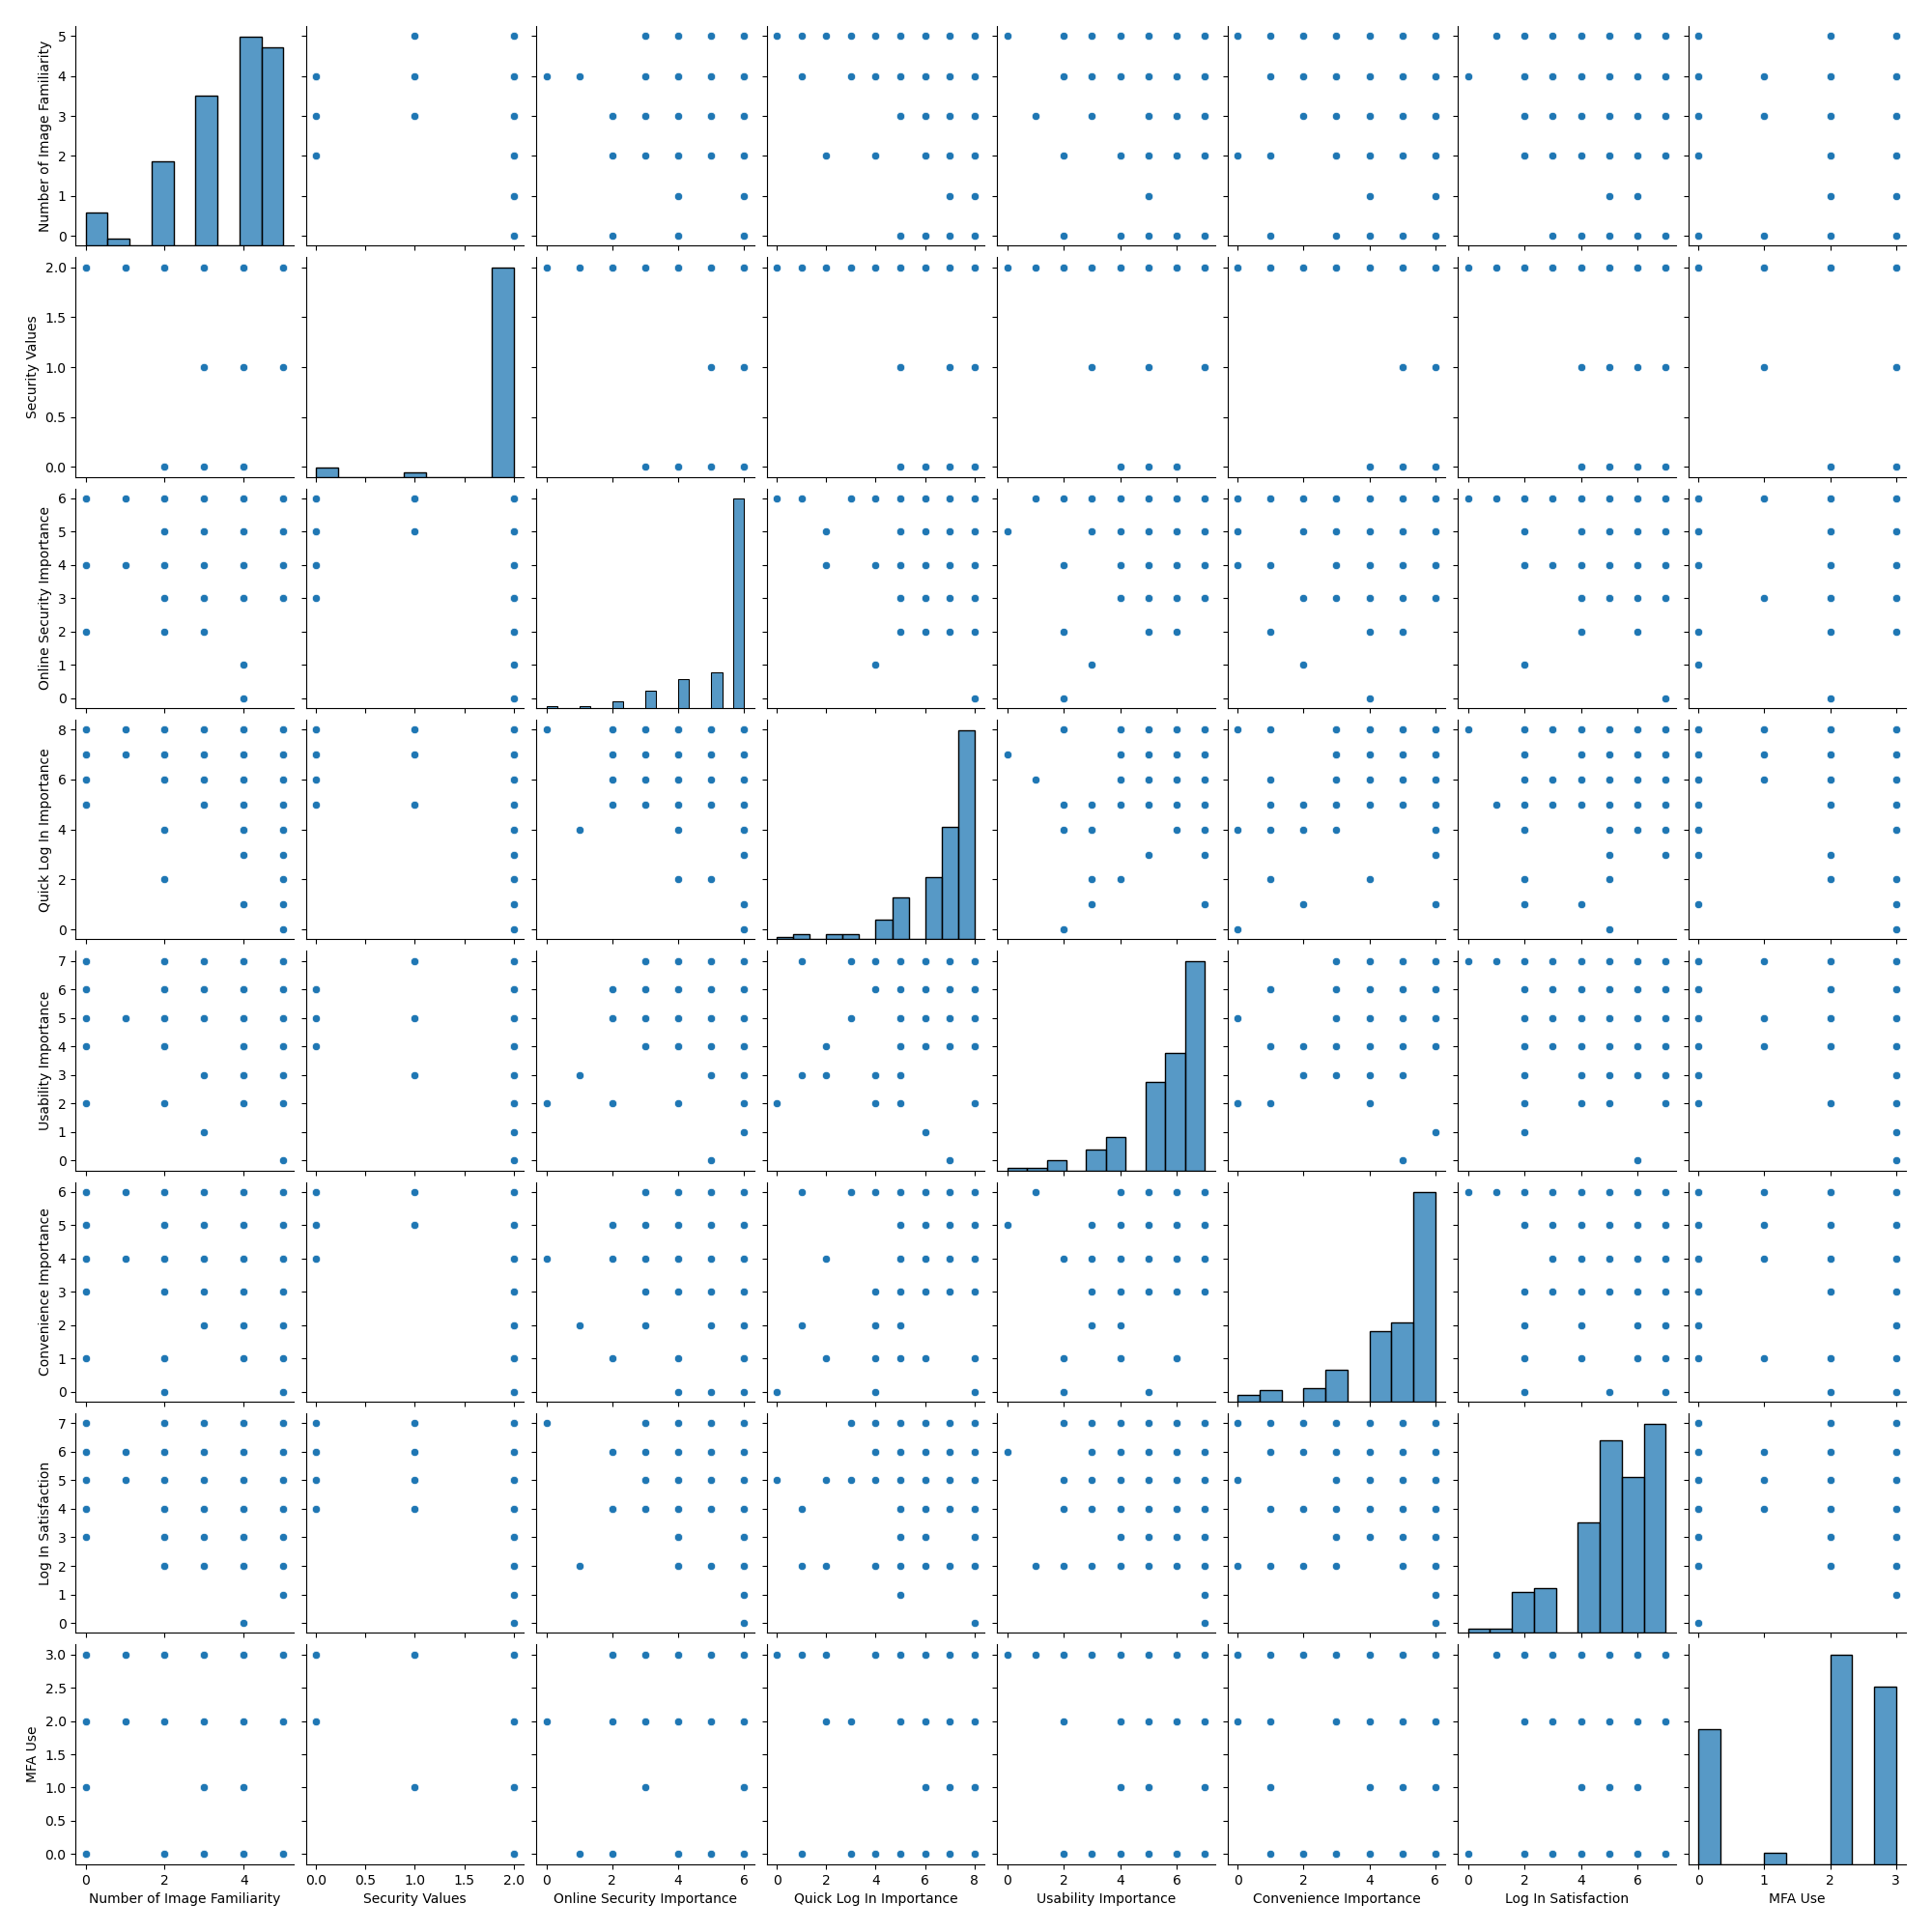

In [5]:
sns.pairplot(dataset)

<IPython.core.display.Javascript object>


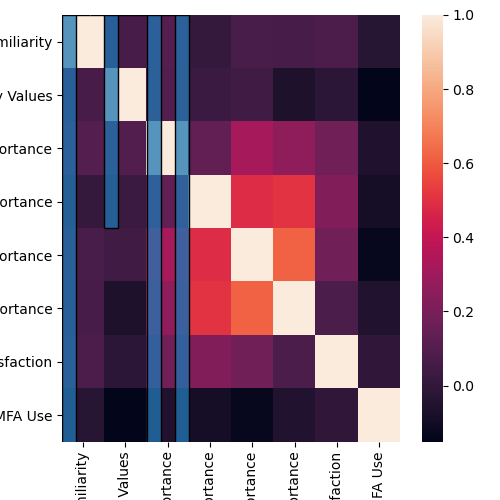

In [6]:
# Check distribution of MFA Use
sns.displot(dataset['MFA Use'])

In [7]:
dataset.corr()

,Number of Image Familiarity,Security Values,Online Security Importance,Quick Log In Importance,Usability Importance,Convenience Importance,Log In Satisfaction,MFA Use
Number of Image Familiarity,1.000000,0.066768,0.102084,0.009250,0.072543,0.065399,0.078293,-0.033912
Security Values,0.066768,1.000000,0.091620,0.025494,0.042402,-0.062568,-0.019977,-0.151689
Online Security Importance,0.102084,0.091620,1.000000,0.137291,0.323204,0.262206,0.185645,-0.056466
Quick Log In Importance,0.009250,0.025494,0.137291,1.000000,0.491157,0.509499,0.222025,-0.087366
Usability Importance,0.072543,0.042402,0.323204,0.491157,1.000000,0.618086,0.177714,-0.131174
Convenience Importance,0.065399,-0.062568,0.262206,0.509499,0.618086,1.000000,0.075150,-0.051406
Log In Satisfaction,0.078293,-0.019977,0.185645,0.222025,0.177714,0.075150,1.000000,-0.005942
MFA Use,-0.033912,-0.151689,-0.056466,-0.087366,-0.131174,-0.051406,-0.005942,1.000000


In [8]:
sns.heatmap(dataset.corr())
plt.show()

In [7]:
# Choose the indepedent variables
X_input_var = dataset.iloc[:, 0].values
print(X_input_var)
# target variable
y_target = dataset.iloc[:,7].values
print(y_target)
# summarize 
print('Input', X_input_var.shape)
print('Output', y_target.shape)

[3 5 3 4 4 3 5 2 2 2 2 3 5 4 3 3 4 4 0 4 5 5 3 2 4 3 3 4 3 2 5 3 5 0 5 4 4
 4 3 3 5 5 5 5 4 5 5 3 5 5 4 3 3 0 4 1 3 4 3 3 2 3 5 5 4 4 3 2 4 5 5 3 2 4
 4 5 4 4 5 4 4 5 4 3 3 0 5 3 1 4 2 3 5 5 3 4 4 3 3 5 3 5 4 4 4 5 5 5 3 5 5
 4 5 2 3 4 5 5 4 2 4 0 4 2 2 4 3 4 3 5 4 3 4 4 4 5 3 3 3 4 0 2 4 4 4 4 5 2
 5 5 4 4 2 3 5 4 4 0 4 5 2 3 0 4 4 0 2 3 5 5 5 5 5 4 5 4 4 5 5 2 2 2 2 5 5
 5]
[2. 3. 3. 2. 2. 3. 2. 0. 2. 3. 2. 3. 3. 0. 0. 0. 2. 0. 1. 0. 2. 0. 3. 0.
 2. 0. 0. 2. 2. 3. 3. 3. 0. 2. 2. 0. 0. 0. 3. 0. 3. 2. 3. 2. 3. 2. 2. 3.
 3. 0. 0. 3. 1. 2. 2. 3. 3. 3. 3. 2. 3. 0. 0. 3. 3. 0. 2. 3. 0. 2. 3. 0.
 2. 2. 0. 3. 3. 3. 2. 3. 0. 0. 2. 3. 2. 3. 3. 2. 2. 0. 3. 2. 2. 0. 2. 2.
 3. 3. 0. 0. 3. 0. 0. 2. 2. 2. 2. 2. 3. 2. 0. 2. 3. 3. 0. 0. 3. 2. 0. 2.
 3. 0. 2. 2. 3. 3. 0. 2. 2. 2. 0. 2. 0. 0. 2. 2. 3. 2. 2. 2. 2. 2. 3. 3.
 2. 3. 2. 2. 2. 3. 3. 3. 2. 3. 3. 2. 2. 0. 0. 0. 3. 1. 3. 2. 3. 3. 0. 2.
 3. 2. 2. 3. 0. 1. 2. 2. 3. 3. 2. 2. 2. 0. 2. 2. 0. 3.]
Input (186,)
Output (186,)


In [8]:
# Deal with missing data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')

# train the imputer instance with the data stored in X(predictors)
imputer = imputer.fit(X_input_var[:,0])
X_input_var[:,0] = imputer.transform(X_input_var[:, 0])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()

X_input_var[:,0] = labelencoder_X.fit_transform(X_input_var[:,0])

onehotencoder = OneHotEncoder(categorical_features = [0])
X_input_var = onehotencoder.fit_transform(X_input_var)